# IMPORTING PACKAGES

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

# READ DATASETS AND PRE-PROCESSING

In [2]:
dataset_setosa = pd.read_csv("datasets/iris/df_setosa_d", sep=',')
dataset_versicolor = pd.read_csv("datasets/iris/df_versicolor_d", sep=',')
dataset_virginica = pd.read_csv("datasets/iris/df_virginica_d", sep=',')

In [3]:
df_setosa_train = dataset_setosa.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_setosa_class = dataset_setosa[["d1", "d2", "d3"]]

In [4]:
setosa_class = []
for st in range(0, len(df_setosa_class)):
    setosa_class.append([df_setosa_class.d1[st], df_setosa_class.d2[st], df_setosa_class.d3[st]])

In [5]:
df_versicolor_train = dataset_versicolor.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_versicolor_class = dataset_versicolor[["d1", "d2", "d3"]]

In [6]:
versicolor_class = []
for ver in range(0, len(df_versicolor_class)):
    versicolor_class.append([df_versicolor_class.d1[ver], df_versicolor_class.d2[ver], df_versicolor_class.d3[ver]])

In [7]:
df_virginica_train = dataset_virginica.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_virginica_class = dataset_virginica[["d1", "d2", "d3"]]

In [8]:
virginica_class = []
for vir in range(0, len(df_virginica_class)):
    virginica_class.append([df_virginica_class.d1[vir], df_virginica_class.d2[vir], df_virginica_class.d3[vir]])

# PERCEPTRON NET CLASS

In [9]:
class Rede_perceptron():
    
    def __init__(self, amostras_entrada, saidas, taxa_aprendizado=0.05, epocas=200, bias=-1, num_neuronios=3):
        self.amostras_entrada = amostras_entrada
        self.saidas = saidas
        self.taxa_aprendizado = taxa_aprendizado
        self.epocas = epocas
        self.bias = bias
        self.num_neuronios = num_neuronios
        self.num_amostras = len(amostras_entrada) 
        self.num_atributos = len(amostras_entrada[0]) 
        self.vetor_pesos = np.zeros((self.num_neuronios, self.num_atributos + 1))
        
    def treino_rede(self):
        
        for amostra in self.amostras_entrada:
            amostra.insert(0, self.bias)
        
        
        for b in range(self.num_neuronios):
            for c in range(self.num_atributos + 1):
                self.vetor_pesos[b][c] = (random.random())
   
        num_epocas = 0 
        
        while True:
        
            erro = False
            
            for i in range(self.num_amostras):
                u = np.zeros(self.num_neuronios)
                
                y_saida = []
                
                for b in range(self.num_neuronios):
                    y_saida.append([])
                    for j in range(self.num_atributos + 1): 
                        u[b] += self.vetor_pesos[b][j] * self.amostras_entrada[i][j] 
                        
                    y_saida[b] = self.valor_saida(u[b])
                
                
                if np.any(y_saida != self.saidas[i]):
                    
                    erro_true = np.subtract(self.saidas[i], y_saida)                    
                    vet_erro = np.array([[erro_true[0]], [erro_true[1]], [erro_true[2]]])
                    self.vetor_pesos = self.vetor_pesos + 0.05 * vet_erro * self.amostras_entrada[i]
                    erro = True 
            
            num_epocas += 1 
            
            if not erro or num_epocas >= self.epocas:
                break
                        
    def teste_rede(self, new_amostras): 
        
        new_amostras.insert(0, self.bias)
        u = np.zeros(self.num_neuronios)
                
        y_saida = []

        for b in range(self.num_neuronios):
            y_saida.append([])
            for j in range(self.num_atributos + 1): 
                u[b] += self.vetor_pesos[b][j] * new_amostras[j] 

            y_saida[b] = self.valor_saida(u[b])
            
            
        return y_saida
        
        
    def valor_saida(self, u):
        
        if u>0:
            return 1
        return 0

In [10]:
def data_test(train_data, class_data, test_size, n_iter):
    
    acc_final = []
    std_final = []

    for rep in range(1 , n_iter + 1):
        X_train, X_test, y_train, y_test = train_test_split(train_data,class_data, 
                                                            test_size=test_size, shuffle=True)

        amostras = X_train.values.tolist()
        saidas = y_train
        new_amotras = X_test.values.tolist()
        amostra_teste = y_test

        rede = Rede_perceptron(amostras, saidas)
        rede.treino_rede()

        classe_predita = []

        for pd in range(len(new_amotras)):
            y = rede.teste_rede(new_amotras[pd])
            classe_predita.append(y)
        

        acc_parcial = []
        for h in range(len(classe_predita)):
            acc = metrics.accuracy_score(amostra_teste[h], classe_predita[h])
            acc_parcial.append(acc)

        
        acc_final.append(np.mean(acc_parcial))
        std_final.append(np.std(acc_parcial))

    acc_real = np.mean(acc_final)
    std_real = np.mean(std_final)
    print("Acurácia Final = {}, Desvio Padrão Final = {}" .format(acc_real, std_real))
    
    return rede, classe_predita, new_amotras

In [11]:
_, _, _ = data_test(df_setosa_train, setosa_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.9981481481481482, Desvio Padrão Final = 0.01080495082875115


In [12]:
_, _, _ = data_test(df_versicolor_train, versicolor_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8896296296296293, Desvio Padrão Final = 0.1513602063041926


In [13]:
_, _, _ = data_test(df_virginica_train, virginica_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8888888888888887, Desvio Padrão Final = 0.15300892223313795


In [14]:
dataset_art_1 = pd.read_csv("datasets/artificial_1/df_artificial_1", sep=',')

In [15]:
dataset_art_1_train = dataset_art_1.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
dataset_art_1_class = dataset_art_1[["d1", "d2", "d3"]]

In [16]:
art_1_class = []
for art in range(0, len(dataset_art_1_class)):
    art_1_class.append([dataset_art_1_class.d1[art], dataset_art_1_class.d2[art], dataset_art_1_class.d3[art]])

In [17]:
rede_art, _, _ = data_test(dataset_art_1_train, art_1_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.9948148148148149, Desvio Padrão Final = 0.02487411195710964


In [18]:
classe_predita = []

for i in np.arange(0,1.05,0.05):
    for k in np.arange(0,1.05,0.05):
        par = [i,k]
        y = rede_art.teste_rede(par)
        classe_predita.append([par[1], par[2], y])

In [19]:
x1 = []
x2 = []
cl = []

for i in range(0, len(classe_predita)):
    plt_x = classe_predita[i][0]
    plt_y = classe_predita[i][1]
    x1.append(plt_x)
    x2.append(plt_y)
    classe = classe_predita[i][2]  
    if classe == [1,0,0]:
        cl.append(1)
    elif classe == [0,1,0]:
        cl.append(2)
    elif classe == [0,0,1]:
        cl.append(3)
    else:
        cl.append(4)

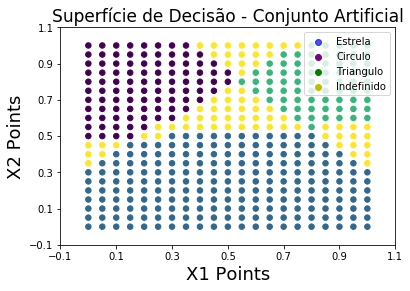

In [20]:
%matplotlib inline
plt.scatter(x1, x2, c=cl, marker='o', s=30)
plt.scatter([], [], alpha=0.7, c="b", label="Estrela")
plt.scatter([], [], alpha=1, c="purple", label="Circulo")
plt.scatter([], [], alpha=1, c="g", label="Triangulo")
plt.scatter([], [], alpha=1, c="y", label="Indefinido")
plt.legend()

plt.xticks(np.arange(-0.1, 1.2, step=0.2))
plt.yticks(np.arange(-0.1, 1.2, step=0.2))
plt.legend()
plt.xlabel("X1 Points", fontsize=18);
plt.ylabel("X2 Points", fontsize=18);
plt.title("Superfície de Decisão - Conjunto Artificial", fontsize=17);

In [21]:
import pandas as pd
dataset_coluna = pd.read_csv("datasets/coluna_vertebral/df_coluna", sep=',')
df_coluna_train = dataset_coluna.drop(['d1', 'd2', 'd3'], axis=1, inplace=False)
df_coluna_class = dataset_coluna[["d1", "d2", "d3"]]

In [22]:
rede_col, _, _ = data_test(df_coluna_train, df_coluna_class.values.tolist(), test_size=0.3, n_iter=20)

Acurácia Final = 0.8283154121863798, Desvio Padrão Final = 0.24888152487388723


In [23]:
dataset_iris = pd.read_csv("datasets/iris/df_iris", sep=',')

In [24]:
dataset_iris_train = dataset_iris.drop(["d_set", "d_vers", "d_virg"], axis=1, inplace=False)
dataset_iris_class = dataset_iris[["d_set", "d_vers", "d_virg"]]

In [25]:
df_iris_class = []
for art in range(0, len(dataset_iris_class)):
    df_iris_class.append([dataset_iris_class.d_set[art], dataset_iris_class.d_vers[art], dataset_iris_class.d_virg[art]])

In [26]:
rede_iris, _, _ = data_test(dataset_iris_train, df_iris_class, test_size=0.3, n_iter=20)

Acurácia Final = 0.8648148148148147, Desvio Padrão Final = 0.17643769112531354
